In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:

# Load CSV file into a DataFrame
df = pd.read_csv('./normal/normal/12.288.csv', header=None)

column_names = [
    'tachometer_signal',  # Column 1
    'underhang_bearing_axial', 'underhang_bearing_radial', 'underhang_bearing_tangential',  # Columns 2 to 4
    'overhang_bearing_axial', 'overhang_bearing_radial', 'overhang_bearing_tangential',  # Columns 5 to 7
    'microphone'  # Column 8
]

df.columns = column_names

First few rows of the DataFrame:
   tachometer_signal  underhang_bearing_axial  underhang_bearing_radial  \
0             4.5595                 0.175200                  0.287210   
1             4.6038                -0.051295                 -0.194050   
2             4.5703                -0.969080                  0.038033   
3             4.5870                 0.891270                  0.072973   
4             4.5887                -1.716000                 -0.329290   

   underhang_bearing_tangential  overhang_bearing_axial  \
0                     -0.017751                -0.41565   
1                     -0.060071                -0.41809   
2                     -0.028329                -0.43081   
3                      0.007453                -0.40017   
4                     -0.033063                -0.50281   

   overhang_bearing_radial  overhang_bearing_tangential  microphone  
0                 0.032459                     -0.11218   -0.128140  
1                 0.0

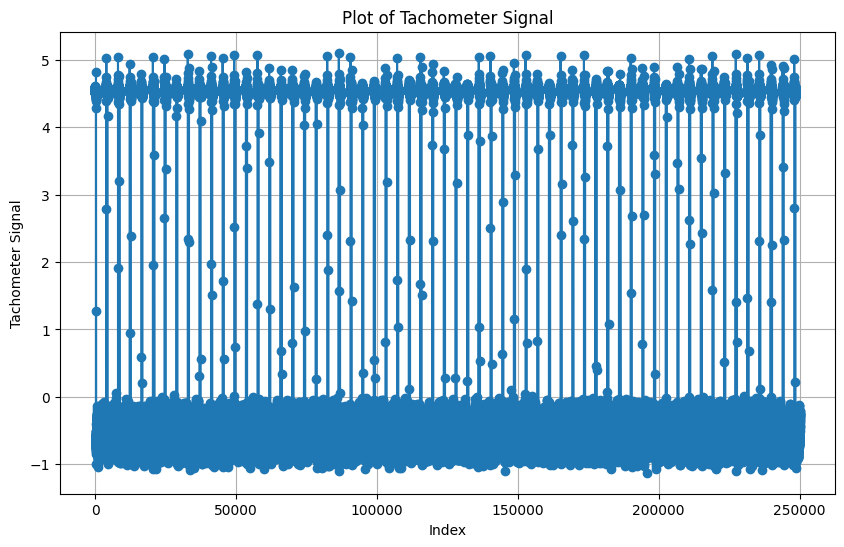

In [4]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Perform some data manipulation (e.g., calculate mean)
mean_values = df.mean()

# Display mean values
print("\nMean values:")
print(mean_values)

# Plotting the data
# For example, let's plot the tachometer signal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tachometer_signal'], marker='o', linestyle='-')
plt.title('Plot of Tachometer Signal')
plt.xlabel('Index')
plt.ylabel('Tachometer Signal')
plt.grid(True)
plt.show()

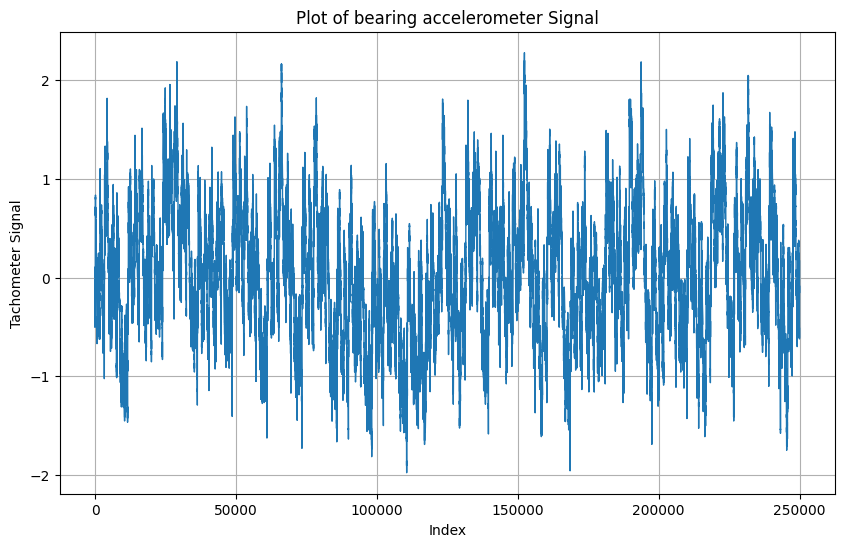

In [7]:
# Plotting the data
# For example, let's plot the tachometer signal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['overhang_bearing_axial'], linestyle='-',  linewidth=1)
plt.title('Plot of bearing accelerometer Signal')
plt.xlabel('Index')
plt.ylabel('Tachometer Signal')
plt.grid(True)
plt.show()

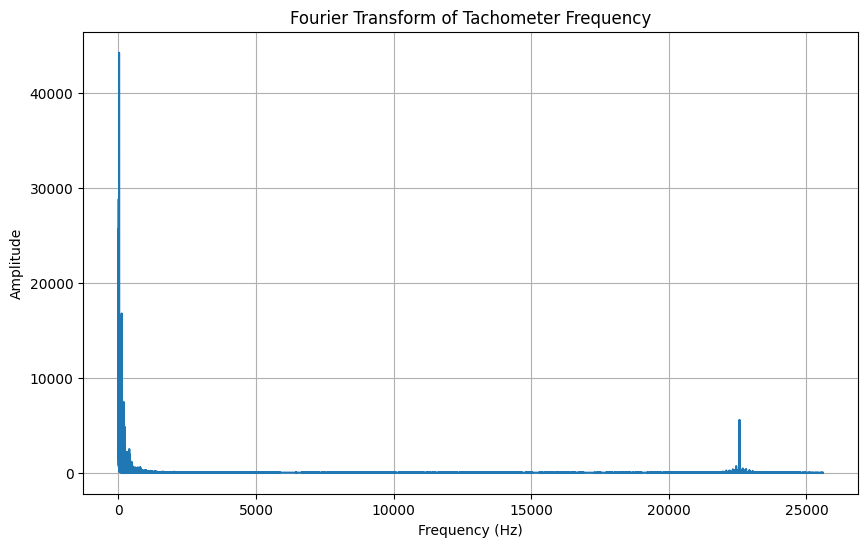

In [8]:
f = 51200 # Hz sampling frequency
signal = df['overhang_bearing_axial']
# Perform Fourier Transform


T = 1/f


fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=T)

# Plot the Fourier Transform
plt.figure(figsize=(10, 6))
plt.plot(freq[:n//2], np.abs(fourier)[:n//2])  # Plot only positive frequencies
plt.title('Fourier Transform of Tachometer Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [11]:
def downsample(df, current_freq, desired_freq):
    ratio = int(current_freq/desired_freq)
    downsampled_df = df.iloc[::ratio]
    print (f'ratio: {ratio}, old size: {df.size}, new size: {downsampled_df.size}') 
    return downsampled_df


new_signal = downsample(signal, f, 330)

ratio: 155, old size: 250000, new size: 1613


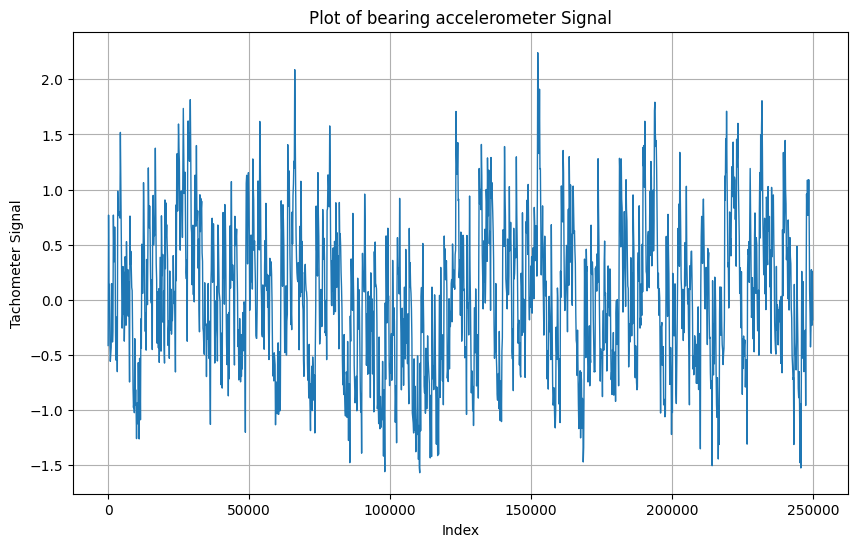

In [14]:
# Plotting the data
# For example, let's plot the tachometer signal
plt.figure(figsize=(10, 6))
plt.plot(new_signal.index, new_signal, linestyle='-',  linewidth=1)
plt.title('Plot of bearing accelerometer Signal')
plt.xlabel('Index')
plt.ylabel('Tachometer Signal')
plt.grid(True)
plt.show()

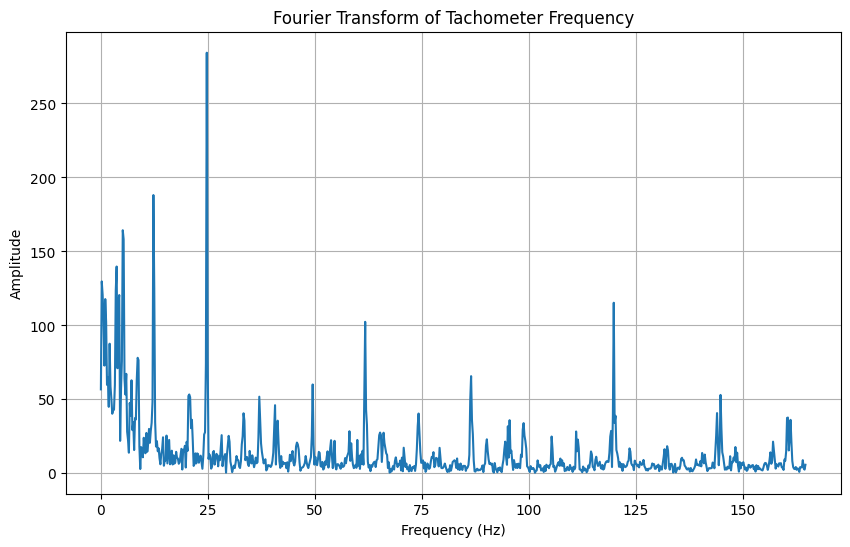

In [17]:
f = 330 # Hz sampling frequency
signal = new_signal
# Perform Fourier Transform


T = 1/f


fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=T)

# Plot the Fourier Transform
plt.figure(figsize=(10, 6))
plt.plot(freq[:n//2], np.abs(fourier)[:n//2])  # Plot only positive frequencies
plt.title('Fourier Transform of Tachometer Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [27]:
def plot_fourier(fourier, freq):
    plt.figure(figsize=(10, 6))
    plt.plot(freq[:n//2], np.abs(fourier)[:n//2])  # Plot only positive frequencies
    plt.title('Fourier Transform of Tachometer Frequency')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


In [ ]:
new_signal.to_csv('/330Hz/output.csv', index=False)


In [21]:
def downsample_csv(name, current_freq, desired_freq):
    path = f'./normal/normal/{name}'
    # Load CSV file into a DataFrame
    df = pd.read_csv(path, header=None)
    column_names = [
        'tachometer_signal',  # Column 1
        'underhang_bearing_axial', 'underhang_bearing_radial', 'underhang_bearing_tangential',  # Columns 2 to 4
        'overhang_bearing_axial', 'overhang_bearing_radial', 'overhang_bearing_tangential',  # Columns 5 to 7
        'microphone'  # Column 8
    ]
    df.columns = column_names
    ratio = int(current_freq/desired_freq)
    downsampled_df = df.iloc[::ratio]
    print(downsampled_df.head())
    print(f'shape: {downsampled_df.shape}')
    downsampled_df.to_csv(f'./330Hz/{name}', index=False)


    
    

downsample_csv('12.288.csv', 51200, 330)

    

     tachometer_signal  underhang_bearing_axial  underhang_bearing_radial  \
0              4.55950                 0.175200                   0.28721   
155            4.53840                 0.777930                   0.20449   
310            4.50970                -1.331100                  -0.21523   
465           -0.64594                -0.019301                   0.16596   
620           -0.60512                 1.086300                   0.18991   

     underhang_bearing_tangential  overhang_bearing_axial  \
0                       -0.017751                -0.41565   
155                      0.011383                 0.76793   
310                     -0.120100                 0.10458   
465                      0.064726                 0.13869   
620                      0.008461                -0.39701   

     overhang_bearing_radial  overhang_bearing_tangential  microphone  
0                   0.032459                    -0.112180   -0.128140  
155                -0.0279

In [46]:

# Specify the directory path
directory_path = './normal/normal'

# List all files in the directory
file_names = os.listdir(directory_path)

# Print the list of file names
print("Files in directory:")
for file_name in file_names:
    print(file_name)
    downsample_csv(file_name, 51200, 330)


Files in directory:
52.4288.csv
     tachometer_signal  underhang_bearing_axial  underhang_bearing_radial  \
0             -0.68818                -0.019834                  -0.18531   
155           -0.71613                 0.352240                  -0.65937   
310           -0.81690                -0.175390                  -0.33559   
465            4.39020                 0.677200                  -0.14807   
620           -0.73295                -0.351990                  -0.23731   

     underhang_bearing_tangential  overhang_bearing_axial  \
0                        0.008256                0.070510   
155                      0.019823                0.031436   
310                     -0.172600                0.080008   
465                      0.201370                0.081935   
620                      0.007241                0.165480   

     overhang_bearing_radial  overhang_bearing_tangential  microphone  
0                   0.024071                    -0.476430   -0.268

1613
0
start i: 0, end i: 1024
(1024,)


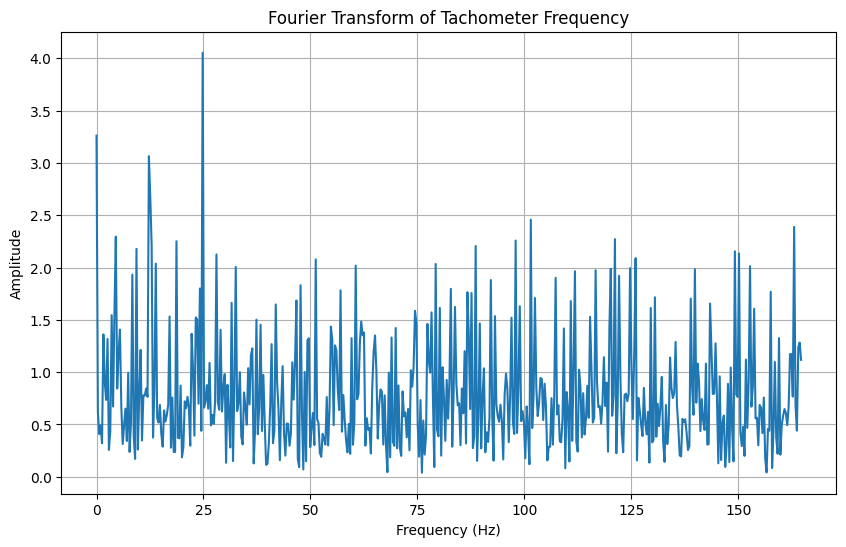

0.000000            0.322266            0.644531  \
0  3.260689+0.000000j  0.534985-0.316891j -0.164150+0.373297j   

             0.966797            1.289062            1.611328  \
0  0.489690-0.038531j -0.256778+0.191340j -1.086927+0.819033j   

             1.933594            2.255859            2.578125  \
0 -0.280064+0.859262j -0.006796-0.734604j -0.068834-1.314976j   

             2.900391  ...           -3.222656           -2.900391  \
0 -0.211329+0.145651j  ... -0.323508-0.298225j -0.211329-0.145651j   

            -2.578125           -2.255859           -1.933594  \
0 -0.068834+1.314976j -0.006796+0.734604j -0.280064-0.859262j   

            -1.611328           -1.289062           -0.966797  \
0 -1.086927-0.819033j -0.256778-0.191340j  0.489690+0.038531j   

            -0.644531           -0.322266  
0 -0.164150-0.373297j  0.534985+0.316891j  

[1 rows x 1024 columns]

In [47]:
def fft_windowing(name, window_size):
    bucket_size = 10
    f = 330
    path = f'./330Hz/{name}'
    # Load CSV file into a DataFrame
    df = pd.read_csv(path)

    # Windowing and Fourier Transform
    df = df['overhang_bearing_radial']
    num_windows = df.size // window_size
    print(df.size)
    fft_results = []
    try:
        for i in range(num_windows):
            print(i)
    
            start_index = i * window_size
            end_index = (i + 1) * window_size
            print(f'start i: {start_index}, end i: {end_index}')
            windowed_data = df.iloc[start_index:end_index].values
            print(windowed_data.shape)
    
            T = 1/f
            fourier = np.fft.fft(windowed_data)
            n = windowed_data.size
            freq = np.fft.fftfreq(n, d=T)
            fft_results.append(fourier)
            
            plt.figure(figsize=(10, 6))
            plt.plot(freq[:n//2], np.abs(fourier)[:n//2])  # Plot only positive frequencies
            plt.title('Fourier Transform of Tachometer Frequency')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude')
            plt.grid(True)
            plt.show()
    except():
        print("window size exceeded")

    fft_df = pd.DataFrame(fft_results)
    fft_df.columns = freq
    return fft_df


fft_windowing('12.288.csv',1024)

Files in directory:
52.4288.csv
1613
0
start i: 0, end i: 1024
(1024,)


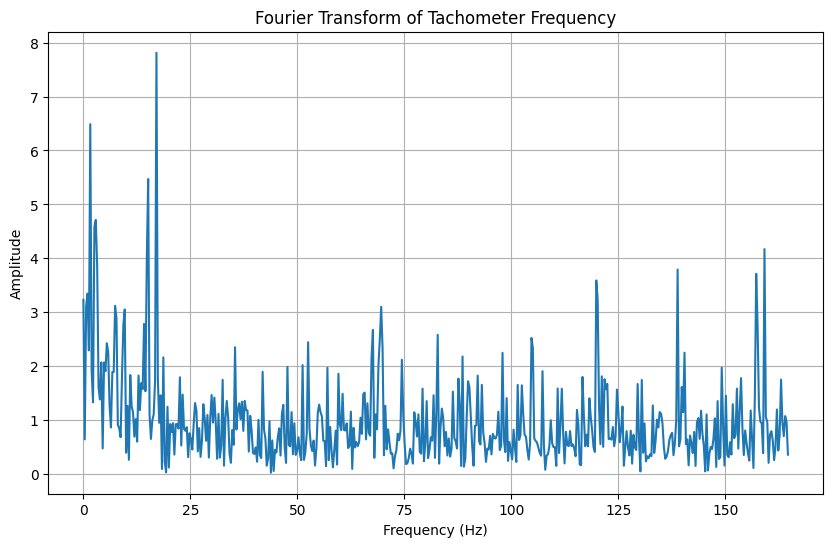

(0, 1024)
19.6608.csv
1613
0
start i: 0, end i: 1024
(1024,)


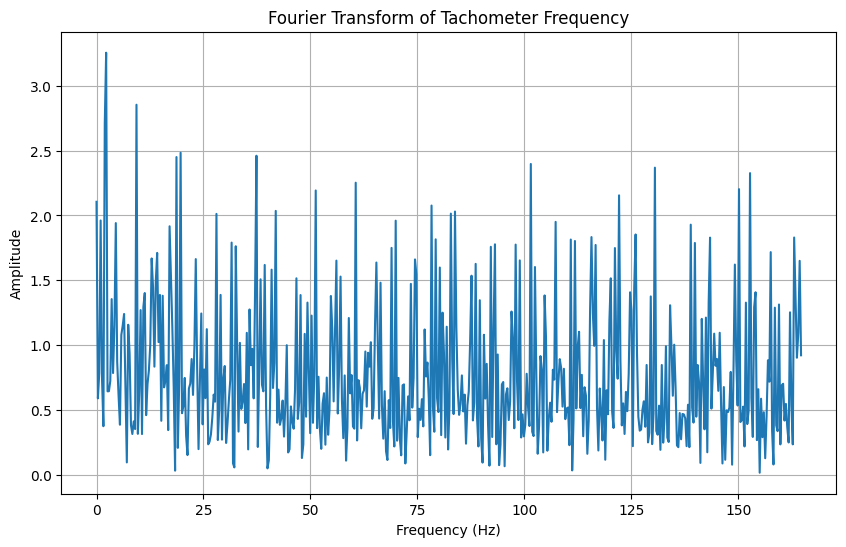

ValueError: columns overlap but no suffix specified: Index([         0.0,  0.322265625,   0.64453125,  0.966796875,    1.2890625,
        1.611328125,   1.93359375,  2.255859375,     2.578125,  2.900390625,
       ...
        -3.22265625, -2.900390625,    -2.578125, -2.255859375,  -1.93359375,
       -1.611328125,   -1.2890625, -0.966796875,  -0.64453125, -0.322265625],
      dtype='float64', length=1024)

In [51]:
# Specify the directory path
directory_path = './330Hz'

# List all files in the directory
file_names = os.listdir(directory_path)
df = pd.DataFrame()
# Print the list of file names
print("Files in directory:")
for file_name in file_names:
    print(file_name)
    df_new = fft_windowing(file_name,1024)
    df = df.join(df_new, how='inner')
    print(df.shape)
    
